# Activity 3: Exploring Bitcoin Dataset
We explore the Bitcoin dataset in this Jupyter Notebook.

## Introduction

In [1]:
%autosave 5

#  Import required libraries
import numpy as np
import pandas as pd
%matplotlib inline

#  Import our custom set of normalization functions
import normalizations

Autosaving every 5 seconds


In [10]:
#  Load the dataset as a pandas DataFrame
bitcoin = pd.read_csv('bitcoin_historical_prices.csv')

#  Change `date` column to datetime type
bitcoin['date'] = pd.to_datetime(bitcoin['date'])
bitcoin.tail()

,date,iso_week,open,high,low,close,volume,market_capitalization
1650,2017-11-03,2017-44,7087.53,7461.29,7002.94,7207.76,3.369860e+09,1.180840e+11
1651,2017-11-04,2017-44,7164.48,7492.86,7031.28,7379.95,2.483800e+09,1.193760e+11
1652,2017-11-05,2017-45,7404.52,7617.48,7333.19,7407.41,2.380410e+09,1.233880e+11
1653,2017-11-06,2017-45,7403.22,7445.77,7007.31,7022.76,3.111900e+09,1.233790e+11
1654,2017-11-07,2017-45,7023.10,7253.32,7023.10,7144.38,2.326340e+09,1.170560e+11


## Exploration

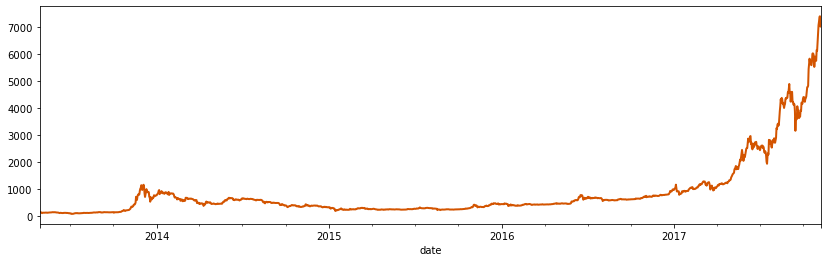

In [4]:
#  Time-series plot for `close` variable
bitcoin.set_index('date')['close'].plot(
    linewidth=2,
    figsize=(14, 4),
    color='#d35400');

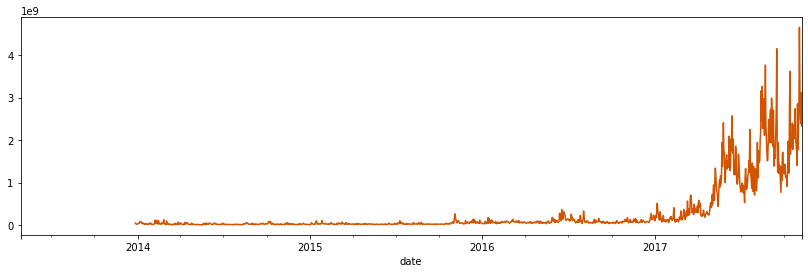

In [5]:
#  TASK:
#  Make a time-series plot for `volume` variable here.
#  How different is the volume data compared to 
#  the closing prices every day?
#
bitcoin.set_index('date')['volume'].plot(figsize=(14,4),color='#d35400')

## Preparing Dataset for Model

In [6]:
# Filter for newer or equal to Jan 1, 2016
bitcoin_recent = bitcoin[bitcoin['date'] >= '2016-01-01']

In [7]:
#  Keep only the `close` and `volume` variables
bitcoin_recent = bitcoin_recent[['date', 'iso_week', 'close', 'volume']]

In [8]:
#  Normalize our data for the the `close` variable.
bitcoin_recent['close_point_relative_normalization'] = bitcoin_recent.groupby('iso_week')['close'].apply(
    lambda x: normalizations.point_relative_normalization(x))

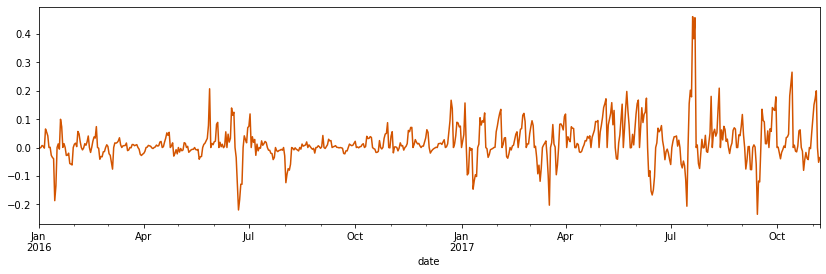

In [9]:
#  Plot for normalized variable `close_point_relative_normalization`
bitcoin_recent.set_index('date')['close_point_relative_normalization'].plot(figsize=(14, 4), color='#d35400');

In [11]:
#  TASK:
#  Normalize our data for the the `volume` variable.
#  Use the name: `volume_point_relative_normalization`
bitcoin_recent['volume_point_relative_normalization'] = bitcoin_recent.groupby('iso_week')['volume'].apply(
    lambda x: normalizations.point_relative_normalization(x))


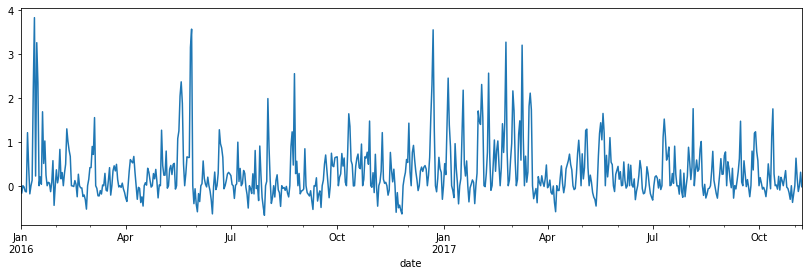

In [13]:
#  TASK:
#  Plot for normalized variable `volume_point_relative_normalization` 
#  in the same way as above
#
bitcoin_recent.set_index('date')['volume_point_relative_normalization'].plot(figsize=(14,4))

## Training and Test Sets

In [14]:
#  Use the last 20% of available weeks as a test set and the first 80% as a training set.
boundary = int(0.8 * bitcoin_recent['iso_week'].nunique())
train_set_weeks = bitcoin_recent['iso_week'].unique()[0:boundary]
test_set_weeks = bitcoin_recent[~bitcoin_recent['iso_week'].isin(train_set_weeks)]['iso_week'].unique()

print(train_set_weeks)
print(test_set_weeks)

['2016-00' '2016-01' '2016-02' '2016-03' '2016-04' '2016-05' '2016-06'
 '2016-07' '2016-08' '2016-09' '2016-10' '2016-11' '2016-12' '2016-13'
 '2016-14' '2016-15' '2016-16' '2016-17' '2016-18' '2016-19' '2016-20'
 '2016-21' '2016-22' '2016-23' '2016-24' '2016-25' '2016-26' '2016-27'
 '2016-28' '2016-29' '2016-30' '2016-31' '2016-32' '2016-33' '2016-34'
 '2016-35' '2016-36' '2016-37' '2016-38' '2016-39' '2016-40' '2016-41'
 '2016-42' '2016-43' '2016-44' '2016-45' '2016-46' '2016-47' '2016-48'
 '2016-49' '2016-50' '2016-51' '2016-52' '2017-01' '2017-02' '2017-03'
 '2017-04' '2017-05' '2017-06' '2017-07' '2017-08' '2017-09' '2017-10'
 '2017-11' '2017-12' '2017-13' '2017-14' '2017-15' '2017-16' '2017-17'
 '2017-18' '2017-19' '2017-20' '2017-21' '2017-22' '2017-23' '2017-24'
 '2017-25']
['2017-26' '2017-27' '2017-28' '2017-29' '2017-30' '2017-31' '2017-32'
 '2017-33' '2017-34' '2017-35' '2017-36' '2017-37' '2017-38' '2017-39'
 '2017-40' '2017-41' '2017-42' '2017-43' '2017-44' '2017-45']


In [16]:
#  Create train dataset
train_dataset = bitcoin_recent[bitcoin_recent['iso_week'].isin(train_set_weeks)]
train_dataset.head()

,date,iso_week,close,volume,close_point_relative_normalization,volume_point_relative_normalization
978,2016-01-01,2016-00,434.33,36278900.0,0.000000,0.000000
979,2016-01-02,2016-00,433.44,30096600.0,-0.002049,-0.170410
980,2016-01-03,2016-01,430.01,39633800.0,0.000000,0.000000
981,2016-01-04,2016-01,433.09,38477500.0,0.007163,-0.029175
982,2016-01-05,2016-01,431.96,34522600.0,0.004535,-0.128961


In [17]:
#  TASK:
#  Create test dataset by performing the same operation as above.
#  Use the `test_set_weeks` list to create the variable `test_dataset`.
#
test_dataset = bitcoin_recent[bitcoin_recent['iso_week'].isin(test_set_weeks)]
test_dataset.head()

,date,iso_week,close,volume,close_point_relative_normalization,volume_point_relative_normalization
1519,2017-06-25,2017-26,2589.41,1.161100e+09,0.000000,0.000000
1520,2017-06-26,2017-26,2478.45,1.663280e+09,-0.042851,0.432504
1521,2017-06-27,2017-26,2552.45,1.489790e+09,-0.014274,0.283085
1522,2017-06-28,2017-26,2574.79,1.183870e+09,-0.005646,0.019611
1523,2017-06-29,2017-26,2539.32,9.499790e+08,-0.019344,-0.181828


## Storing Output

In [19]:
bitcoin_recent.to_csv('bitcoin_recent.csv', index=False)
train_dataset.to_csv('train_dataset.csv', index=False)
test_dataset.to_csv('test_dataset.csv', index=False)